In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
df = pd.read_csv('/Users/ryanng/Desktop/nyc_pluto_22v3_1_csv/pluto_22v3_1.csv')

df_selected = df[['borough','lotarea', 'bldgarea','zonedist1','latitude','longitude','cd']]
df_selected.dropna(subset=['bldgarea'], inplace=True)
df_selected.dropna(subset=['zonedist1'], inplace=True)
def get_first_letter(string):
    return string[0]
df_selected['column_name'] = df_selected['zonedist1'].apply(get_first_letter)

/var/folders/mq/85gqchqx0zgg03bk5c8gqjpr0000gn/T/ipykernel_47501/2473200109.py:4: DtypeWarning: Columns (21,22,24,26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/ryanng/Desktop/nyc_pluto_22v3_1_csv/pluto_22v3_1.csv')
/var/folders/mq/85gqchqx0zgg03bk5c8gqjpr0000gn/T/ipykernel_47501/2473200109.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(subset=['bldgarea'], inplace=True)
/var/folders/mq/85gqchqx0zgg03bk5c8gqjpr0000gn/T/ipykernel_47501/2473200109.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.dropna(subset=['zonedist1']

In [2]:
df_selected

,borough,lotarea,bldgarea,zonedist1,latitude,longitude,cd,column_name
0,BK,2017.0,1210.0,R6B,40.687196,-73.946599,303.0,R
1,BK,1833.0,1551.0,R5,40.614595,-73.992299,311.0,R
2,BK,2424.0,2352.0,R5,40.612501,-73.991842,311.0,R
3,BK,1400.0,2124.0,R6B,40.681827,-73.941303,303.0,R
4,BK,1779.0,3132.0,R6B,40.632047,-74.021282,310.0,R
...,...,...,...,...,...,...,...,...
858613,BK,833.0,0.0,R6,40.693757,-73.923496,304.0,R
858614,BK,1600.0,2200.0,R6B,40.687395,-73.975113,302.0,R
858615,BK,59066.0,0.0,M1-1,40.651631,-73.906935,316.0,M
858616,QN,976261.0,0.0,M1-1,40.708049,-73.773339,412.0,M


In [3]:
gdf = gpd.GeoDataFrame(df_selected, geometry=gpd.points_from_xy(df_selected.longitude, df_selected.latitude))
gdf['density']=gdf['bldgarea']/gdf['lotarea']
gdf=gdf[gdf['density']<=6]
gdf

,borough,lotarea,bldgarea,zonedist1,latitude,longitude,cd,column_name,geometry,density
0,BK,2017.0,1210.0,R6B,40.687196,-73.946599,303.0,R,POINT (-73.94660 40.68720),0.599901
1,BK,1833.0,1551.0,R5,40.614595,-73.992299,311.0,R,POINT (-73.99230 40.61460),0.846154
2,BK,2424.0,2352.0,R5,40.612501,-73.991842,311.0,R,POINT (-73.99184 40.61250),0.970297
3,BK,1400.0,2124.0,R6B,40.681827,-73.941303,303.0,R,POINT (-73.94130 40.68183),1.517143
4,BK,1779.0,3132.0,R6B,40.632047,-74.021282,310.0,R,POINT (-74.02128 40.63205),1.760540
...,...,...,...,...,...,...,...,...,...,...
858613,BK,833.0,0.0,R6,40.693757,-73.923496,304.0,R,POINT (-73.92350 40.69376),0.000000
858614,BK,1600.0,2200.0,R6B,40.687395,-73.975113,302.0,R,POINT (-73.97511 40.68740),1.375000
858615,BK,59066.0,0.0,M1-1,40.651631,-73.906935,316.0,M,POINT (-73.90693 40.65163),0.000000
858616,QN,976261.0,0.0,M1-1,40.708049,-73.773339,412.0,M,POINT (-73.77334 40.70805),0.000000


In [4]:
map_data=gdf.drop_duplicates(subset='borough', keep='first')
map_data

,borough,lotarea,bldgarea,zonedist1,latitude,longitude,cd,column_name,geometry,density
0,BK,2017.0,1210.0,R6B,40.687196,-73.946599,303.0,R,POINT (-73.94660 40.68720),0.599901
10,MN,1699.0,4484.0,R7-2,40.812789,-73.943106,110.0,R,POINT (-73.94311 40.81279),2.639200
18,QN,3999.0,7691.0,R6,40.768892,-73.830917,407.0,R,POINT (-73.83092 40.76889),1.923231
48,BX,1126.0,2139.0,R6,40.810975,-73.924825,201.0,R,POINT (-73.92482 40.81097),1.899645
81,SI,2499.0,605.0,R3-2,40.625783,-74.083688,501.0,R,POINT (-74.08369 40.62578),0.242097


In [5]:
borough_data=gdf.groupby('borough')['lotarea','bldgarea'].sum()
borough_data['density']=borough_data['bldgarea']/borough_data['lotarea']
borough_data

/var/folders/mq/85gqchqx0zgg03bk5c8gqjpr0000gn/T/ipykernel_47501/3725904613.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  borough_data=gdf.groupby('borough')['lotarea','bldgarea'].sum()


,lotarea,bldgarea,density
borough,,,
BK,1.681637e+09,1.379062e+09,0.820071
BX,9.402194e+08,7.092739e+08,0.754371
MN,4.086838e+08,6.408007e+08,1.567962
QN,2.438522e+09,1.191584e+09,0.488650
SI,1.362657e+09,2.944627e+08,0.216095


In [6]:
merged_df = pd.merge(borough_data, map_data, on='borough', how='left')
merged_df=merged_df[['borough','density_x','geometry']]

In [7]:
merged_df

,borough,density_x,geometry
0,BK,0.820071,POINT (-73.94660 40.68720)
1,BX,0.754371,POINT (-73.92482 40.81097)
2,MN,1.567962,POINT (-73.94311 40.81279)
3,QN,0.488650,POINT (-73.83092 40.76889)
4,SI,0.216095,POINT (-74.08369 40.62578)


In [8]:
path_to_data = gpd.datasets.get_path("nybb")
gdf1 = gpd.read_file(path_to_data)
gdf1['density']=[0.216095,0.488650,0.820071,1.567962,0.754371]
gdf1

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,density
0,5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227....",0.216095
1,4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957...",0.488650
2,3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100...",0.820071
3,1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940....",1.567962
4,2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278...",0.754371


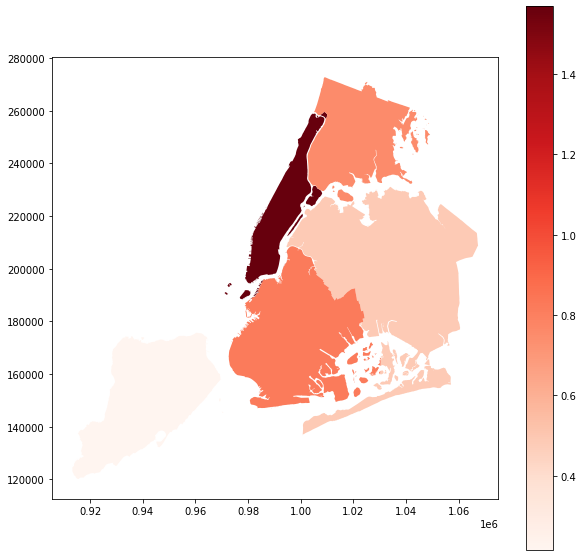

In [9]:
gdf1.plot(column='density', cmap='Reds',legend=True,figsize=(10, 10))
plt.savefig('borough_plot.jpg')

In [ ]:
borough_bar = merged_df.sort_values('density',ascending=False)

district_bar.plot.bar(x='district', y='density', figsize=(40, 20))
plt.savefig('bar_chart_district_data.jpg')
# 显示图形
plt.show()
